<a href="https://colab.research.google.com/github/pedroblossbraga/Public-Health/blob/master/COVID19_PedroBlossBraga_05032020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Coronavirus - COVID-19 Statistical Analysis**

## Studying the ages, deaths and recovered cases.

<br>

dataset source:
https://docs.google.com/spreadsheets/d/1jS24DjSPVWa4iuxuD4OAXrE3QeI8c9BC1hSlqr-NMiU/edit#gid=1187587451

from DXY.cn

Last update: 03/04/2020,  2:00 PM (EST)


In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [6]:
# Auto-iterate through all files that matches this query
file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
for file1 in file_list:
  if 'Kudos' in file1['title']:
    print('title: %s, id: %s' % (file1['title'], file1['id']))
  

title: Kudos to DXY.cn Last update_ 03_04_2020,  2_00 PM (EST) - Line-list.csv, id: 1yXIDP0m-I9TF7HCJWtwDYC5z6OxCiZV_
title: Kudos to DXY.cn Last update: 03/04/2020,  2:00 PM (EST), id: 1jS24DjSPVWa4iuxuD4OAXrE3QeI8c9BC1hSlqr-NMiU


In [0]:
'''
title: Kudos to DXY.cn Last update_ 03_04_2020,  2_00 PM (EST) - Line-list.csv, id: 1yXIDP0m-I9TF7HCJWtwDYC5z6OxCiZV_
'''

downloaded = drive.CreateFile({'id': '1yXIDP0m-I9TF7HCJWtwDYC5z6OxCiZV_'})
downloaded.GetContentFile('Kudos to DXY.cn Last update_ 03_04_2020,  2_00 PM (EST) - Line-list.csv')


In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:

df = pd.read_csv('Kudos to DXY.cn Last update_ 03_04_2020,  2_00 PM (EST) - Line-list.csv', sep=',')
df.head()

,Email,Unnamed: 1,contact.sunky@gmail.com,Unnamed: 3,Email was incorrect before,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,id,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,traveler,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
1,1,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66,1/3/2020,0,1/11/2020,12/29/2019,1/4/2020,NaN,1,0,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
2,2,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56,1/15/2020,0,1/15/2020,NaN,1/12/2020,NaN,0,1,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
3,3,NaN,1/21/2020,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46,1/4/2020,0,1/17/2020,NaN,1/3/2020,NaN,0,1,0,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
4,4,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60,NaN,NaN,1/19/2020,NaN,NaN,NaN,1,0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?


In [13]:
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header 
df.head()

,id,case_in_country,reporting date,summary,location,country,gender,age,symptom_onset,If_onset_approximated,hosp_visit_date,exposure_start,exposure_end,traveler,visiting Wuhan,from Wuhan,death,recovered,symptom,source,link
1,1,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,"Shenzhen, Guangdong",China,male,66,1/3/2020,0,1/11/2020,12/29/2019,1/4/2020,NaN,1,0,0,0,NaN,Shenzhen Municipal Health Commission,http://wjw.sz.gov.cn/wzx/202001/t20200120_1898...
2,2,NaN,1/20/2020,First confirmed imported COVID-19 pneumonia pa...,Shanghai,China,female,56,1/15/2020,0,1/15/2020,NaN,1/12/2020,NaN,0,1,0,0,NaN,Official Weibo of Shanghai Municipal Health Co...,https://www.weibo.com/2372649470/IqogQhgfa?fro...
3,3,NaN,1/21/2020,First confirmed imported cases in Zhejiang: pa...,Zhejiang,China,male,46,1/4/2020,0,1/17/2020,NaN,1/3/2020,NaN,0,1,0,0,NaN,Health Commission of Zhejiang Province,http://www.zjwjw.gov.cn/art/2020/1/21/art_1202...
4,4,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,female,60,NaN,NaN,1/19/2020,NaN,NaN,NaN,1,0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?
5,5,NaN,1/21/2020,new confirmed imported COVID-19 pneumonia in T...,Tianjin,China,male,58,NaN,NaN,1/14/2020,NaN,NaN,NaN,0,0,0,0,NaN,人民日报官方微博,https://m.weibo.cn/status/4463235401268457?


In [15]:
df.columns

Index(['id', 'case_in_country', 'reporting date', 'summary', 'location',
       'country', 'gender', 'age', 'symptom_onset', 'If_onset_approximated',
       'hosp_visit_date', 'exposure_start', 'exposure_end', 'traveler',
       'visiting Wuhan', 'from Wuhan', 'death', 'recovered', 'symptom',
       'source', 'link'],
      dtype='object', name=0)

In [40]:
df['recovered'].describe()

count     1461
unique      36
top          0
freq      1279
Name: recovered, dtype: object

In [41]:
df['recovered'].unique()

array(['0', '1', '2/12/2020', '1/15/2020', '12/30/1899', '2/8/2020',
       '2/14/2020', '2/4/2020', '2/18/2020', '2/5/2020', '2/17/2020',
       '2/9/2020', '2/15/2020', '2/27/2020', '2/19/2020', '2/20/2020',
       '1/17/2020', '2/7/2020', '2/21/2020', '2/23/2020', '2/11/2020',
       '2/22/2020', '2/29/2020', '3/2/2020', '2/16/2020', '2/24/2020',
       '2/26/2020', '2/28/2020', '3/1/2020', '2/25/2020', '3/4/2020',
       '2/6/2020', '1/30/2020', '2/13/2020', '2/2/2020', '1/31/2020', nan],
      dtype=object)

In [14]:
df['age'].describe()

count     1035
unique      88
top         55
freq        92
Name: age, dtype: object

In [25]:
age=[]
for k in range(len(df['age'].values)):
  if type(df['age'].values[k]) == str:
    age.append(float(df['age'].values[k]))
  else:
    age.append(-1)
age

[66.0,
 56.0,
 46.0,
 60.0,
 58.0,
 44.0,
 34.0,
 37.0,
 39.0,
 56.0,
 18.0,
 32.0,
 37.0,
 51.0,
 57.0,
 56.0,
 50.0,
 52.0,
 33.0,
 40.0,
 70.0,
 51.0,
 -1,
 28.0,
 37.0,
 19.0,
 29.0,
 66.0,
 46.0,
 32.0,
 28.0,
 55.0,
 68.0,
 38.0,
 72.0,
 45.0,
 42.0,
 33.0,
 33.0,
 37.0,
 69.0,
 63.0,
 62.0,
 49.0,
 50.0,
 48.0,
 36.0,
 36.0,
 61.0,
 69.0,
 89.0,
 89.0,
 66.0,
 75.0,
 48.0,
 82.0,
 66.0,
 81.0,
 82.0,
 65.0,
 80.0,
 53.0,
 86.0,
 70.0,
 84.0,
 50.0,
 40.0,
 45.0,
 66.0,
 59.0,
 23.0,
 50.0,
 43.0,
 49.0,
 42.0,
 32.0,
 22.0,
 47.0,
 52.0,
 53.0,
 46.0,
 85.0,
 69.0,
 36.0,
 73.0,
 70.0,
 81.0,
 65.0,
 42.0,
 30.0,
 29.0,
 -1,
 49.0,
 23.0,
 56.0,
 39.0,
 39.0,
 34.0,
 49.0,
 70.0,
 76.0,
 72.0,
 79.0,
 55.0,
 87.0,
 66.0,
 58.0,
 66.0,
 78.0,
 67.0,
 65.0,
 58.0,
 67.0,
 82.0,
 49.0,
 2.0,
 -1,
 59.0,
 57.0,
 68.0,
 40.0,
 46.0,
 56.0,
 29.0,
 29.0,
 57.0,
 30.0,
 33.0,
 20.0,
 24.0,
 28.0,
 41.0,
 46.0,
 45.0,
 9.0,
 40.0,
 28.0,
 27.0,
 15.0,
 42.0,
 24.0,
 32.0,
 34.0,
 63.0,


In [27]:
df['death'].describe()

count     1461
unique      16
top          0
freq      1391
Name: death, dtype: object

In [28]:
df['death'].unique()

array(['0', '1', '2/14/2020', '2/26/2020', '2/13/2020', '2/28/2020',
       '2/27/2020', '2/25/2020', '2/23/2020', '2/24/2020', '2/22/2020',
       '2/29/2020', '3/1/2020', nan, '2/1/2020', '2/19/2020', '2/21/2020'],
      dtype=object)

In [31]:
death=[]
for k in range(len(df['death'].values)):
  if df['death'].values[k] == '0':
    death.append(0)
  elif df['death'].values[k] == '1' or type(df['death'].values[k]) == str:
    death.append(1)
  else:
    death.append(-1)
death

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [43]:
recovered=[]
for k in range(len(df['recovered'].values)):
  if df['recovered'].values[k] == '0':
    recovered.append(0)
  elif df['recovered'].values[k] == '1' or type(df['recovered'].values[k]) == str:
    recovered.append(1)
  else:
    recovered.append(-1)
recovered

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [32]:
len(age), len(death)

(1492, 1492)

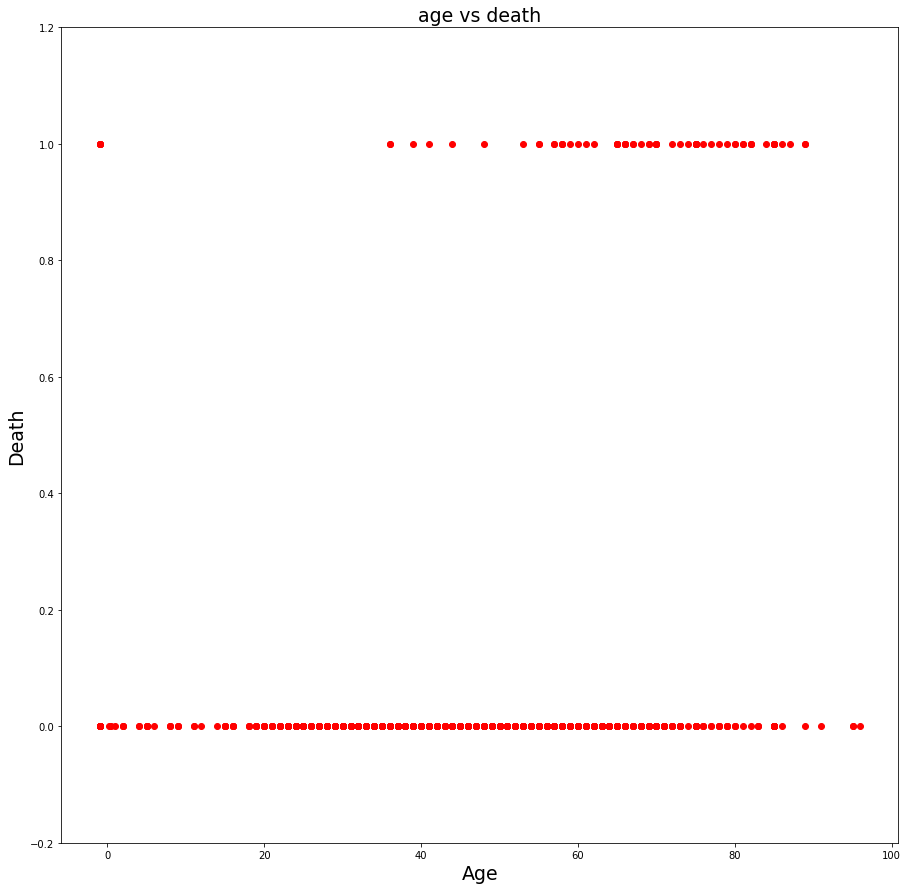

In [53]:
plt.figure(figsize=(15,15))

plt.title("age vs death", fontsize=19)
plt.scatter(age, death, color='red')

#plt.plot(age, death)
plt.ylim([-0.2, 1.2])
plt.ylabel('Death', fontsize=19)
plt.xlabel('Age', fontsize=19)
plt.show()

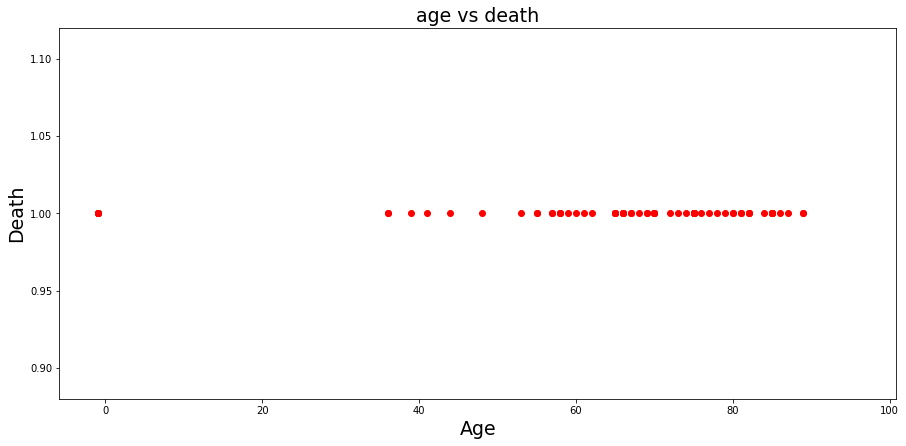

In [57]:
plt.figure(figsize=(15,15))

plt.subplot(2,1,1)
plt.title("age vs death", fontsize=19)
plt.scatter(age, death, color='red')

#plt.plot(age, death)
plt.ylim([0.88, 1.12])
plt.ylabel('Death', fontsize=19)
plt.xlabel('Age', fontsize=19)
plt.show()

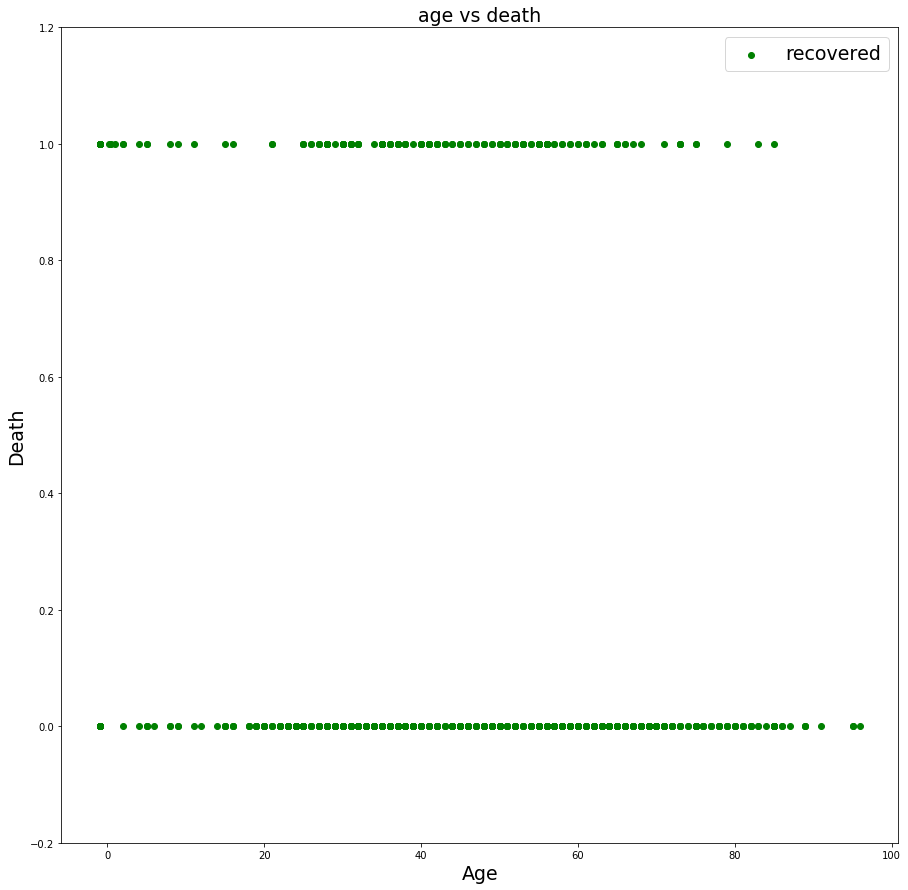

In [52]:
plt.figure(figsize=(15,15))

plt.title("age vs death", fontsize=19)
#plt.scatter(age, death, color='red')
plt.scatter(age, recovered, color='green', label='recovered')
plt.legend(loc='best', fontsize=19)
#plt.plot(age, death)
plt.ylim([-0.2, 1.2])
plt.ylabel('Death', fontsize=19)
plt.xlabel('Age', fontsize=19)
plt.show()

In [61]:
df.columns

Index(['id', 'case_in_country', 'reporting date', 'summary', 'location',
       'country', 'gender', 'age', 'symptom_onset', 'If_onset_approximated',
       'hosp_visit_date', 'exposure_start', 'exposure_end', 'traveler',
       'visiting Wuhan', 'from Wuhan', 'death', 'recovered', 'symptom',
       'source', 'link'],
      dtype='object', name=0)

In [62]:
df['country'].unique()

array(['China', 'France', 'Japan', 'Malaysia', 'Nepal', 'Singapore',
       'South Korea', 'Taiwan', 'Thailand', 'USA', 'Vietnam', 'Australia',
       'Canada', 'Cambodia', 'Sri Lanka', 'Germany', 'UAE', 'Hong Kong',
       'Italy', 'Russia', 'UK', nan, 'India', 'Phillipines', 'Finland',
       'Spain', 'Sweden', 'Belgium', 'Egypt', 'Iran', 'Israel', 'Lebanon',
       'Kuwait', 'Bahrain', 'Austria', 'Afghanistan', 'Algeria',
       'Croatia', 'Switzerland'], dtype=object)

In [63]:
italy, china=[],[]
for k in range(len(df['country'].values)):
  if df['country'].values[k] == 'Italy':
    italy.append(1)
    china.append(0)
  elif df['country'].values[k] == 'China':
    italy.append(0)
    china.append(1)
  else:
    italy.append(0)
    china.append(0)
italy

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [64]:
china

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


# I'll create a filtered dataframe, with numbers and labels, to study

In [65]:
data = {
    'death': death,
    'age': age,
    'recovered': recovered,
    'italy':italy,
    'china':china
}
columns = [
           'death', 'age', 'recovered',
           'italy', 'china'

           ]
df2 = pd.DataFrame(data, columns = columns)
df2

,death,age,recovered,italy,china
0,0,66.0,0,0,1
1,0,56.0,0,0,1
2,0,46.0,0,0,1
3,0,60.0,0,0,1
4,0,58.0,0,0,1
...,...,...,...,...,...
1487,0,26.0,0,0,0
1488,0,30.0,0,0,0
1489,0,49.0,0,0,0
1490,0,-1.0,0,0,0


In [76]:
df2[df2['death']==1][df2['italy']==1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,death,age,recovered,italy,china
1223,1,77.0,0,1,0
1280,1,68.0,0,1,0


In [77]:
df2[df2['death']==1][df2['china']==1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,death,age,recovered,italy,china
48,1,61.0,0,0,1
49,1,69.0,0,0,1
50,1,89.0,0,0,1
51,1,89.0,0,0,1
52,1,66.0,0,0,1
53,1,75.0,0,0,1
54,1,48.0,0,0,1
55,1,82.0,0,0,1
56,1,66.0,0,0,1
57,1,81.0,0,0,1


In [82]:
df2[df2['age']>=60][df2['death']==1].describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,death,age,recovered,italy,china
count,50.0,50.000000,50.0,50.000000,50.000000
mean,1.0,74.680000,0.0,0.040000,0.660000
std,0.0,8.092425,0.0,0.197949,0.478518
min,1.0,60.000000,0.0,0.000000,0.000000
25%,1.0,67.250000,0.0,0.000000,0.000000
50%,1.0,75.000000,0.0,0.000000,1.000000
75%,1.0,81.750000,0.0,0.000000,1.000000
max,1.0,89.000000,0.0,1.000000,1.000000


In [83]:
df2[df2['age']<60][df2['death']==1].describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,death,age,recovered,italy,china
count,20.0,20.000000,20.0,20.0,20.000000
mean,1.0,37.450000,0.0,0.0,0.300000
std,0.0,23.972517,0.0,0.0,0.470162
min,1.0,-1.000000,0.0,0.0,0.000000
25%,1.0,26.750000,0.0,0.0,0.000000
50%,1.0,46.000000,0.0,0.0,0.000000
75%,1.0,57.000000,0.0,0.0,1.000000
max,1.0,59.000000,0.0,0.0,1.000000


In [84]:
df2[df2['recovered']==1]

,death,age,recovered,italy,china
194,0,28.0,1,0,1
195,0,51.0,1,0,1
196,0,37.0,1,0,1
198,0,31.0,1,0,0
199,0,30.0,1,0,0
...,...,...,...,...,...
1344,0,38.0,1,0,0
1347,0,-1.0,1,0,0
1348,0,-1.0,1,0,0
1372,0,28.0,1,0,0


# I want to check if the subjects already had other diseases, such as pneumonia:

In [86]:
df['summary'].unique()

array(['First confirmed imported COVID-19 pneumonia patient in Shenzhen (from Wuhan): male, 66, shenzheng residence, visited relatives in Wuhan on 12/29/2019, symptoms onset on 01/03/2020, returned to Shenzhen and seek medical care on 01/04/2020, hospitalized on 01/11/2020, sample sent to China CDC for testing on 01/18/2020, confirmed on 01/19/2020. 8 others under medical observation, contact tracing ongoing.',
       'First confirmed imported COVID-19 pneumonia patient in Shanghai (from Wuhan): female, 56, Wuhan residence, arrived in Shanghai from  Wuhan on 01/12/2020, symptom onset and visited fever clinic on 01/15/2020, laboratory confirmed on 01/20/2020',
       'First confirmed imported cases in Zhejiang: patient is male, 46, lives in Wuhan, self-driving from Wuhan to Hangzhou on 01/03/2020, symptom onset 01/04/2020, hospitalized on 01/17/2020, sample deliver to China CDC for testing on 01/20/2020, test positive on 01/21/2020.',
       ...,
       'new COVID-19 patient confirmed i

In [89]:
df['summary'].unique()[0]

'First confirmed imported COVID-19 pneumonia patient in Shenzhen (from Wuhan): male, 66, shenzheng residence, visited relatives in Wuhan on 12/29/2019, symptoms onset on 01/03/2020, returned to Shenzhen and seek medical care on 01/04/2020, hospitalized on 01/11/2020, sample sent to China CDC for testing on 01/18/2020, confirmed on 01/19/2020. 8 others under medical observation, contact tracing ongoing.'

In [90]:
c=0
for summ in df['summary'].unique():
  if type(summ) == str:
    if 'pneumonia' in summ:
      c+=1
c

217

In [91]:
len(df['summary'].unique())

1246

In [92]:
for item in df['summary'].unique():
  print(item)

First confirmed imported COVID-19 pneumonia patient in Shenzhen (from Wuhan): male, 66, shenzheng residence, visited relatives in Wuhan on 12/29/2019, symptoms onset on 01/03/2020, returned to Shenzhen and seek medical care on 01/04/2020, hospitalized on 01/11/2020, sample sent to China CDC for testing on 01/18/2020, confirmed on 01/19/2020. 8 others under medical observation, contact tracing ongoing.
First confirmed imported COVID-19 pneumonia patient in Shanghai (from Wuhan): female, 56, Wuhan residence, arrived in Shanghai from  Wuhan on 01/12/2020, symptom onset and visited fever clinic on 01/15/2020, laboratory confirmed on 01/20/2020
First confirmed imported cases in Zhejiang: patient is male, 46, lives in Wuhan, self-driving from Wuhan to Hangzhou on 01/03/2020, symptom onset 01/04/2020, hospitalized on 01/17/2020, sample deliver to China CDC for testing on 01/20/2020, test positive on 01/21/2020.
new confirmed imported COVID-19 pneumonia in Tianjin: female, age 60, recently vis

In [93]:
for item in df['summary'].unique():
  if type(item) != str:
    print(item)

nan


In [0]:
summaries = []
for item in df['summary'].values:
  if type(item) == str:
    summaries.append(item)
  else:
    summaries.append('-')

In [0]:
for item in summaries:
  if type(item) != str:
    print(item)

In [108]:
p = [] # pneumonia

for summ in summaries:
  if 'pneumonia' in summ:
    p.append(1)
  else:
    p.append(0)

len(p)

1492

In [101]:
len(df2['age'].values)

1492

In [0]:
df2['pneumonia'] = p

In [110]:
df2

,death,age,recovered,italy,china,pneumonia
0,0,66.0,0,0,1,1
1,0,56.0,0,0,1,1
2,0,46.0,0,0,1,0
3,0,60.0,0,0,1,1
4,0,58.0,0,0,1,1
...,...,...,...,...,...,...
1487,0,26.0,0,0,0,0
1488,0,30.0,0,0,0,0
1489,0,49.0,0,0,0,0
1490,0,-1.0,0,0,0,0


In [112]:
df2[df2['age']>=60][df2['death']==1][df2['pneumonia']==1].describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,death,age,recovered,italy,china,pneumonia
count,35.0,35.000000,35.0,35.0,35.000000,35.0
mean,1.0,74.657143,0.0,0.0,0.942857,1.0
std,0.0,8.422459,0.0,0.0,0.235504,0.0
min,1.0,61.000000,0.0,0.0,0.000000,1.0
25%,1.0,66.500000,0.0,0.0,1.000000,1.0
50%,1.0,73.000000,0.0,0.0,1.000000,1.0
75%,1.0,82.000000,0.0,0.0,1.000000,1.0
max,1.0,89.000000,0.0,0.0,1.000000,1.0


In [113]:
df2[df2['age']>=60][df2['death']==1][df2['pneumonia']==0].describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,death,age,recovered,italy,china,pneumonia
count,15.0,15.000000,15.0,15.000000,15.0,15.0
mean,1.0,74.733333,0.0,0.133333,0.0,0.0
std,0.0,7.544787,0.0,0.351866,0.0,0.0
min,1.0,60.000000,0.0,0.000000,0.0,0.0
25%,1.0,72.000000,0.0,0.000000,0.0,0.0
50%,1.0,75.000000,0.0,0.000000,0.0,0.0
75%,1.0,78.500000,0.0,0.000000,0.0,0.0
max,1.0,85.000000,0.0,1.000000,0.0,0.0


In [115]:
print('Percentage of elements with age >= 60, death confirmed and pneumonia regarding the total deaths of elements with age >= 60: ', 35*100/(35+15), '%')

Percentage of elements with death and pneumonia regarding the total deaths:  70.0 %


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


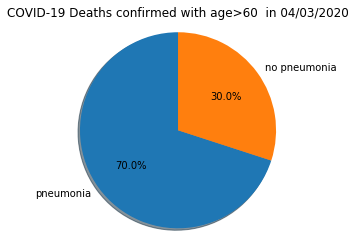

In [140]:
pn = df2[df2['age']>=60][df2['death']==1][df2['pneumonia']==1].count()[0]
npn = df2[df2['age']>=60][df2['death']==1][df2['pneumonia']==0].count()[0]
tot = pn + npn

pneum = [pn*100/tot, npn*100/tot]

labels_pneumonia = ['pneumonia', 'no pneumonia']

fig1, ax1= plt.subplots()

plt.title('COVID-19 Deaths confirmed with age>60  in 04/03/2020')

ax1.pie(pneum, labels=labels_pneumonia, autopct="%1.1f%%",
        shadow=True, startangle=90)

ax1.axis('equal')
plt.show()

In [117]:
df2[df2['age']<60][df2['death']==1][df2['pneumonia']==0].describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,death,age,recovered,italy,china,pneumonia
count,14.0,14.00000,14.0,14.0,14.0,14.0
mean,1.0,31.50000,0.0,0.0,0.0,0.0
std,0.0,26.18793,0.0,0.0,0.0,0.0
min,1.0,-1.00000,0.0,0.0,0.0,0.0
25%,1.0,-1.00000,0.0,0.0,0.0,0.0
50%,1.0,40.00000,0.0,0.0,0.0,0.0
75%,1.0,56.50000,0.0,0.0,0.0,0.0
max,1.0,59.00000,0.0,0.0,0.0,0.0


In [118]:
df2[df2['age']<60][df2['death']==1][df2['pneumonia']==1].describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,death,age,recovered,italy,china,pneumonia
count,6.0,6.000000,6.0,6.0,6.0,6.0
mean,1.0,51.333333,0.0,0.0,1.0,1.0
std,0.0,8.382521,0.0,0.0,0.0,0.0
min,1.0,36.000000,0.0,0.0,1.0,1.0
25%,1.0,49.250000,0.0,0.0,1.0,1.0
50%,1.0,54.000000,0.0,0.0,1.0,1.0
75%,1.0,57.250000,0.0,0.0,1.0,1.0
max,1.0,58.000000,0.0,0.0,1.0,1.0


## I intend to plot a pie-graph in order to visualize the percentage of each age group with deaths

In [119]:
df2[df2['death']==1][df2['age']>=60].describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,death,age,recovered,italy,china,pneumonia
count,50.0,50.000000,50.0,50.000000,50.000000,50.00000
mean,1.0,74.680000,0.0,0.040000,0.660000,0.70000
std,0.0,8.092425,0.0,0.197949,0.478518,0.46291
min,1.0,60.000000,0.0,0.000000,0.000000,0.00000
25%,1.0,67.250000,0.0,0.000000,0.000000,0.00000
50%,1.0,75.000000,0.0,0.000000,1.000000,1.00000
75%,1.0,81.750000,0.0,0.000000,1.000000,1.00000
max,1.0,89.000000,0.0,1.000000,1.000000,1.00000


In [127]:
df2[df2['death']==1][df2['age']>=60].count()[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


50

In [128]:
df2[df2['death']==1][df2['age']<60].describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,death,age,recovered,italy,china,pneumonia
count,20.0,20.000000,20.0,20.0,20.000000,20.000000
mean,1.0,37.450000,0.0,0.0,0.300000,0.300000
std,0.0,23.972517,0.0,0.0,0.470162,0.470162
min,1.0,-1.000000,0.0,0.0,0.000000,0.000000
25%,1.0,26.750000,0.0,0.0,0.000000,0.000000
50%,1.0,46.000000,0.0,0.0,0.000000,0.000000
75%,1.0,57.000000,0.0,0.0,1.000000,1.000000
max,1.0,59.000000,0.0,0.0,1.000000,1.000000


In [126]:
df2[df2['death']==1][df2['age']<60].count()[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


20

In [134]:
eldery = df2[df2['death']==1][df2['age']>=60].count()[0]
n_eldery = df2[df2['death']==1][df2['age']<60].count()[0]
total = df2[df2['death']==1][df2['age']>=60].count()[0] + df2[df2['death']==1][df2['age']<60].count()[0]

p_eld = df2[df2['death']==1][df2['age']>=60].count()[0] * 100 / total
p_neld = df2[df2['death']==1][df2['age']<60].count()[0] * 100 / total

p = [p_eld, p_neld]
labels=['age>=60', 'age<60']

print(p)
print(labels)

[71.42857142857143, 28.571428571428573]
['age>=60', 'age<60']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


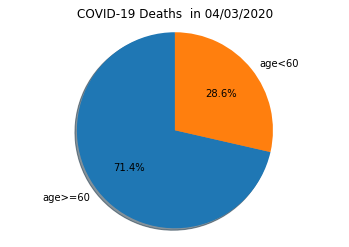

In [141]:
fig1, ax1= plt.subplots()

plt.title('COVID-19 Deaths  in 04/03/2020')

ax1.pie(p, labels=labels, autopct="%1.1f%%",
        shadow=True, startangle=90)

ax1.axis('equal')
plt.show()

# Now I'll visualize with more age segmentations:

In [147]:
df2[df2['death']==1][df2['age']<30][df2['age']>18].count()[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0

In [150]:
df2[df2['death']==1][df2['age']<60][df2['age']>=30].count()[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


15

In [146]:
df2[df2['death']==1][df2['age']<18].count()[0]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


5

[7.142857142857143, 0.0, 21.428571428571427, 71.42857142857143]
['age<18', '18<=age<30', '30<=age<60', 'age>60']


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


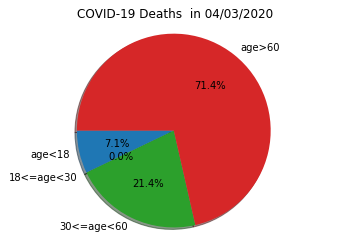

In [153]:
#  x<18
d1 = df2[df2['death']==1][df2['age']<18].count()[0]
# 18 <= x <30
d2 = df2[df2['death']==1][df2['age']<30][df2['age']>=18].count()[0]
# 30 <= x < 60
d3 = df2[df2['death']==1][df2['age']<60][df2['age']>=30].count()[0]
# x >= 60
d4 = df2[df2['death']==1][df2['age']>=60].count()[0]

total = d1+d2+d3+d4


p = [d1*100/total,
     d2*100/total,
     d3*100/total,
     d4*100/total]

labels=['age<18',
        '18<=age<30',
        '30<=age<60',
        'age>60']

print(p)
print(labels)

fig1, ax1= plt.subplots()

plt.title('COVID-19 Deaths  in 04/03/2020')

ax1.pie(p, labels=labels, autopct="%1.1f%%",
        shadow=True, startangle=180)

ax1.axis('equal')
plt.show()